<a href="https://colab.research.google.com/github/maketwane/demo_app/blob/main/Session_4_TS_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import math

In [ ]:
#Load the data

df = pd.read_csv('day.csv')

#show the first few rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Select the relevant features

features = ['cnt','hum','temp','windspeed','weathersit']
data = df[features].values

In [ ]:
type(data)

numpy.ndarray

In [ ]:
data[0]

array([9.85000e+02, 8.05833e-01, 3.44167e-01, 1.60446e-01, 2.00000e+00])

In [ ]:
#Scale the data between 0 and 1

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data) #shape(num_samples,num_features)

In [ ]:
#create a function for sliding window

def create_multivariate_dataset(dataset,window_size=7,target_col=0):
    X,y=[], []
    for i in range(len(dataset)-window_size):
        X.append(dataset[i:i+window_size,:])
        y.append(dataset[i + window_size,target_col])
    return np.array(X), np.array(y)

window_size = 7
X,y = create_multivariate_dataset(data_scaled,window_size,target_col=0)
print('X shape',X.shape)
print('y shape',y.shape)


X shape (724, 7, 5)
y shape (724,)


In [ ]:
X[0]

array([[0.11079153, 0.82862005, 0.3551696 , 0.2846062 , 0.5       ],
       [0.08962264, 0.71577069, 0.37923205, 0.46621455, 0.5       ],
       [0.15266912, 0.44963805, 0.1709998 , 0.4657404 , 0.        ],
       [0.17717441, 0.60713111, 0.17553044, 0.28429697, 0.        ],
       [0.18154625, 0.44931311, 0.20912018, 0.33914251, 0.        ],
       [0.18223654, 0.5329162 , 0.18094826, 0.1384817 , 0.        ],
       [0.1711919 , 0.51279794, 0.17119668, 0.30167586, 0.5       ]])

In [ ]:
y[0]

0.10780027611596871

In [ ]:
#Split into training and testing dataset

split = int(len(X) * 0.8)
X_train, y_train = X[:split],y[:split]
X_test, y_test = X[split:],y[split:]


In [ ]:
#Create sequential model

model = Sequential([
    LSTM(64,input_shape=(window_size,X.shape[2]),return_sequences=False),
    Dense(1)
])
model.compile(optimizer = 'adam',loss = 'mse')
model.summary()


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,985 (70.25 KB)

 Trainable params: 17,985 (70.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#fit the model

history = model.fit(
    X_train,y_train,
    epochs = 30,
    batch_size = 16,
    validation_data=(X_test,y_test),
    verbose = 1
)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0501 - val_loss: 0.0230
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0124 - val_loss: 0.0268
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0125 - val_loss: 0.0219
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0110 - val_loss: 0.0219
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0109 - val_loss: 0.0216
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0126 - val_loss: 0.0212
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - val_loss: 0.0219
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0143 - val_loss: 0.0216
Epoch 9/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - val_loss: 0.0213
Epoch 10/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0118 - val_loss: 0.0220
Epoch 11/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0127 - val_loss: 0.0208
Epoch 12/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.01

In [ ]:
#Predict on test set

y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


In [ ]:
#Invert scaling to original scale for visualization

y_test_full = []
y_pred_full = []

for i in range(len(y_test)):
    #get the actual other features for the last input day
    last_features = X_test[i][-1][1:] #all features except the rentals
    #append actual
    y_test_row = np.concatenate(([y_test[i]],last_features))
    y_pred_row = np.concatenate(([y_pred[i][0]],last_features))
    y_test_full.append(y_test_row)
    y_pred_full.append(y_pred_row)

y_test_full = np.array(y_test_full)
y_pred_full = np.array(y_pred_full)

y_test_inv = scaler.inverse_transform(y_test_full)[:,0] #first column: rentals
y_pred_inv = scaler.inverse_transform(y_pred_full)[:,0] #first column: rentals

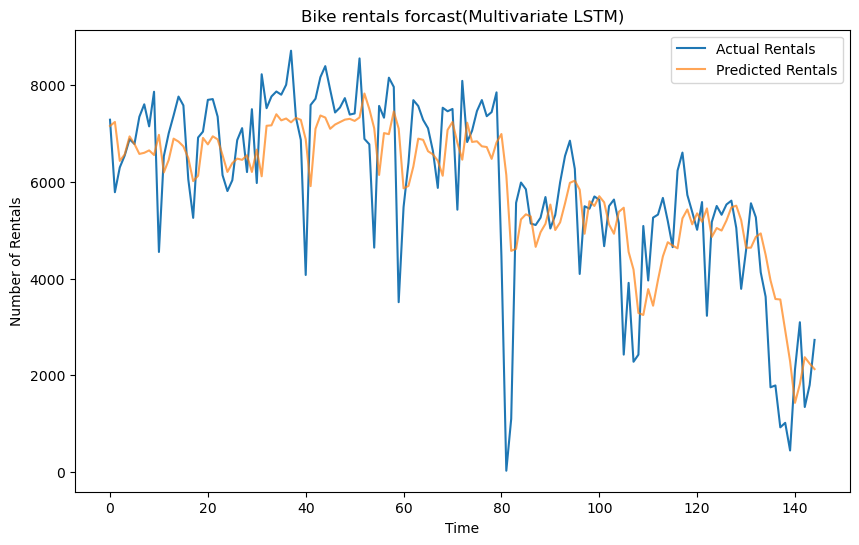

In [ ]:
#Plot actual vs predicted rentals

plt.figure(figsize=(10,6))
plt.plot(y_test_inv,label = 'Actual Rentals')
plt.plot(y_pred_inv,label = 'Predicted Rentals', alpha =0.7)
plt.xlabel('Time')
plt.ylabel('Number of Rentals')
plt.title("Bike rentals forcast(Multivariate LSTM)")
plt.legend()
plt.show()


In [ ]:
#Evaluate the model

rmse = np.sqrt(mean_squared_error(y_test_inv,y_pred_inv))
print("Test RMSE:",rmse)

Test RMSE: 1213.646772583251
